In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [17]:
np.random.seed(20)
x = np.random.randn(2000, 2)
y = np.logical_xor(x[:, 0] > 0,  x[:, 1] > 0)

#### Choosing Colormaps in Matplotlib
https://matplotlib.org/stable/users/explain/colors/colormaps.html

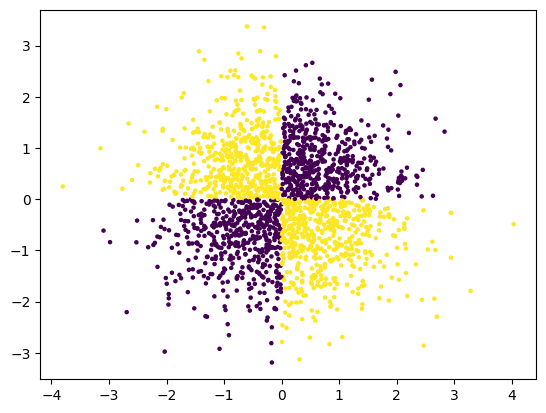

In [19]:
plt.scatter(x[:, 0], x[:, 1], c=y, s=5, cmap=plt.cm.viridis)
plt.show()

In [20]:
z = (x[:, 0] * x[:, 1]).reshape(-1, 1)
xn = np.hstack([x, z])

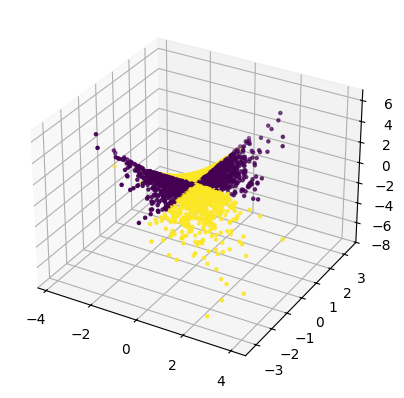

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xn[:, 0], xn[:, 1], xn[:, 2],c=y, s=5, 
           cmap=plt.cm.viridis)
plt.show()

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv('dataset/Letters.csv')
df.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [27]:
df.shape

(20000, 17)

In [32]:
def find_index(dataset, char):
    indices = np.where(np.array(dataset)[:, 0] == char)[0]
    return indices
b_indices = find_index(df, 'B')
df.iloc[b_indices].head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
6,B,4,2,5,4,4,8,7,6,6,7,6,6,2,8,7,10
33,B,5,9,7,7,10,9,8,4,4,6,8,6,6,11,8,7
123,B,3,3,3,4,3,7,7,5,5,7,6,6,5,8,5,10
124,B,5,9,7,7,7,8,8,3,6,10,5,6,3,7,6,8
156,B,4,2,5,4,4,7,7,5,6,7,6,6,2,8,7,10


In [34]:
x = np.array(df)[:, 1:]
y = np.array(df.letter)

In [35]:
y

array(['T', 'I', 'D', ..., 'T', 'S', 'A'], dtype=object)

In [36]:
x_train = x[:16000, :]
x_test = x[16000:, :]
y_train = y[:16000]
y_test = y[16000:]

In [49]:
from sklearn import svm

model = svm.SVC(C=0.5)
model.fit(x_train, y_train)

SVC(C=0.5)

In [50]:
y_pred = model.predict(x_test)
print(y_test[:10])
print(y_pred[:10])

['U' 'N' 'V' 'I' 'N' 'H' 'E' 'Y' 'G' 'E']
['M' 'N' 'R' 'X' 'N' 'H' 'E' 'Y' 'G' 'E']


In [51]:
model.score(x_test, y_test)*100

89.425

In [41]:
y_grid = np.column_stack([y_test, y_pred])
y_grid

array([['U', 'U'],
       ['N', 'N'],
       ['V', 'V'],
       ...,
       ['T', 'T'],
       ['S', 'S'],
       ['A', 'A']], dtype=object)

In [45]:
import string
chars = list(string.ascii_uppercase)
chars_pred = [f'Predicted {char}' for char in chars]

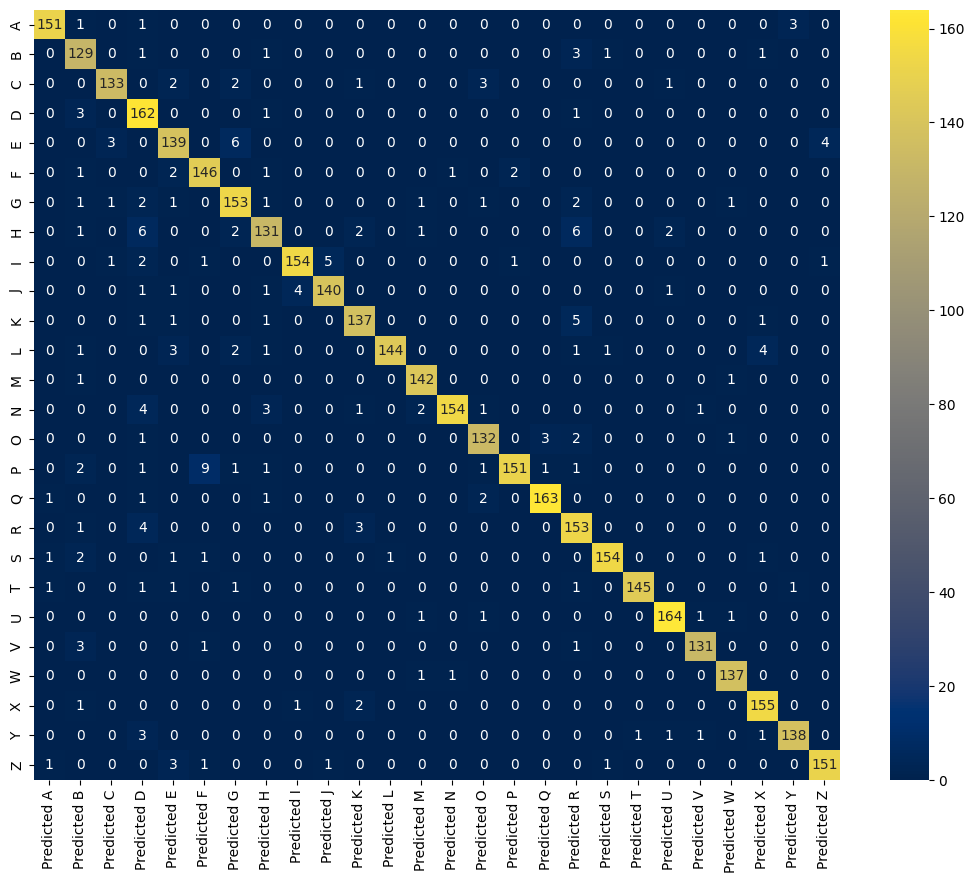

In [47]:
from sklearn import metrics

confusion = metrics.confusion_matrix(y_test,
                                     y_pred,
                                     labels=chars)
confusion_df = pd.DataFrame(confusion,
                           index=chars,
                           columns=chars_pred)

plt.figure(figsize=(13, 10))
sns.heatmap(confusion_df, 
           annot=True,
           fmt='g',
           cmap=plt.cm.cividis)
plt.show()

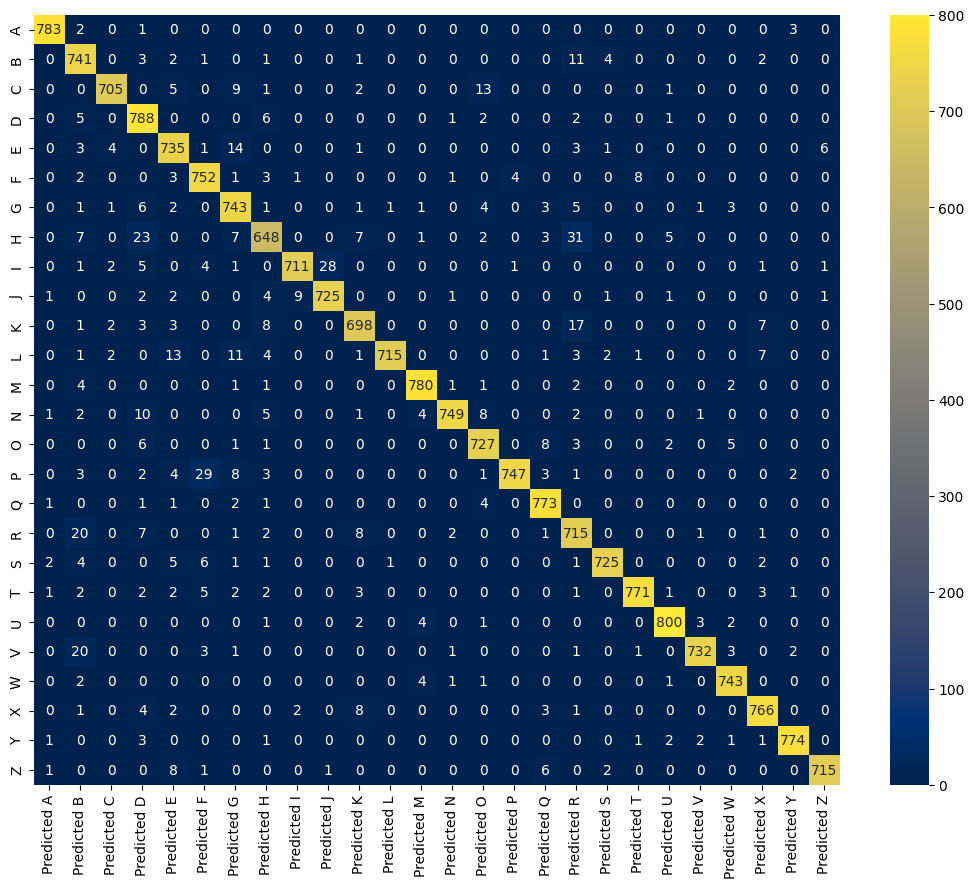

In [48]:
from sklearn import metrics

confusion_m = metrics.confusion_matrix(y,
                                     model.predict(x),
                                     labels=chars)
confusion_df_all = pd.DataFrame(confusion_m,
                           index=chars,
                           columns=chars_pred)

plt.figure(figsize=(13, 10))
sns.heatmap(confusion_df_all, 
           annot=True,
           fmt='g',
           cmap=plt.cm.cividis)
plt.show()